In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

In [3]:
def my_pdf(n):
    x = np.linspace(-3, 3, n)
    mu = 0
    sigma = 1.0
    y = normal_pdf(x, mu, sigma)
    return x, y

In [4]:
def softmax(ys):
    ys = torch.from_numpy(ys)
    ys = F.softmax(ys, dim=0)
    ys = ys.numpy()
    return ys

In [5]:
def plot_stuff(n, color):
    x, y = my_pdf(n)
    yh = softmax(y)
    print(np.sum(yh))
    plt.plot(x, yh, color=color, label=f"n={n}")

0.997292067626924
1.0
1.0
0.9999999999999999
1.0


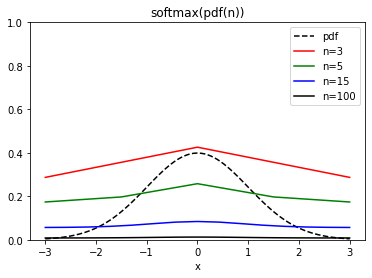

In [6]:
x, y = my_pdf(100)
print(np.trapz(y, x))
plt.plot(x, y, "--k", label="pdf")
plot_stuff(3, "r")
plot_stuff(5, "g")
plot_stuff(15, "b")
plot_stuff(100, "k")
plt.ylim([0, 1.0])
plt.legend()
plt.title("softmax(pdf(n))")
plt.xlabel("x");